<a href="https://colab.research.google.com/github/jermwatt/machine_learning_refined/blob/main/notes/5_Linear_regression/5_3_Absolute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 5: Linear regression

# Least Absolute Deviations

In this Section we talk about a slight twist on the derivation of the Least Squares cost function that leads to an alternative cost for linear regression called *Least Absolute Deviations*.  This alternative cost function is much more robust to outliers in a dataset than the original Least Squares.  

In [1]:


# install github clone - allows for easy cloning of subdirectories
!pip install github-clone
from pathlib import Path 

# clone datasets
if not Path('chapter_5_datasets').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/5_Linear_regression/chapter_5_datasets
else:
    print('chapter_5_datasets already cloned!')

# clone library subdirectory
if not Path('chapter_5_library').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/5_Linear_regression/chapter_5_library
else:
    print('chapter_5_library already cloned!')

# append path for local library, data, and image import
import sys
sys.path.append('./chapter_5_library')
sys.path.append('./chapter_5_datasets') 

# import section helper
import section_5_3_helpers

# dataset paths
data_path_1 = 'chapter_5_datasets/regression_outliers.csv'

# standard imports
import matplotlib.pyplot as plt

# import autograd-wrapped numpy
import autograd.numpy as np

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
chapter_5_datasets already cloned!
chapter_5_library already cloned!


##  The susceptibility of the Least Squares cost to outliers

One downside of using the squared error in the Least Squares cost - as a measure that we then minimize to recover optimal linear regression parameters -  is that *squaring the error increases the importance of larger errors*.  In particular squaring errors of length greater than $1$ makes these values considerably larger.  This forces weights learned via the Least Squares cost to produce a linear fit that is especially focused on trying to minimize these large errors - often due to *outliers* in a dataset.   In other words, the Least Squares cost produces linear models that *tend to overfit to outliers in a dataset*.  

We illustrate this fact via a simple dataset in the following example.

#### <span style="color:#a50e3e;">Example 1: </span>  Least Squares overfits to outliers

In this example we use the dataset plotted below - which can largely be represented by a proper linear model with the exception of a single large outlier - to show how the Least Squares cost function for linear regression tends to create linear models that *overfit* to outliers.

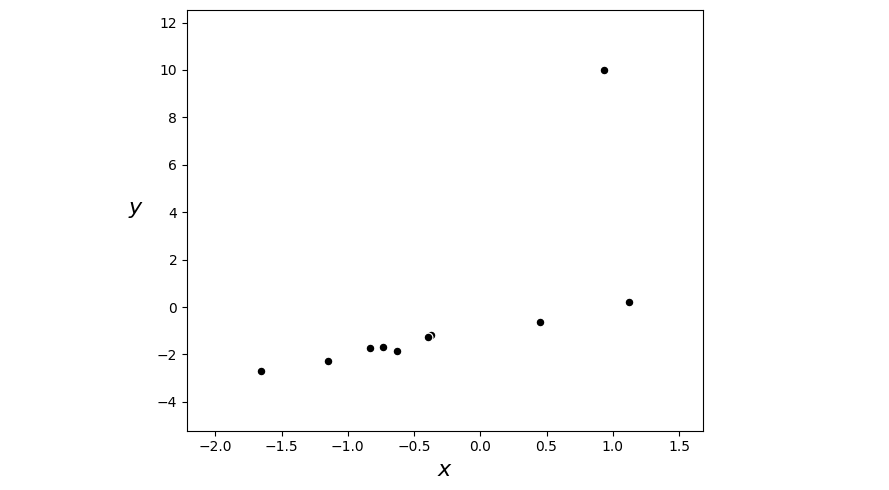

In [2]:
# load in dataset
data = np.loadtxt(data_path_1, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# plot dataset
demo = section_5_3_helpers.linear_regression_visualizer(data)
demo.plot_data()

We now tune the parameters of a linear regressor to this dataset by minimizing the Least squares cost via gradient descent.  $20$ steps are indeed sufficient in this case (as we can verify by visually examining the cost function history plot).

In [3]:
# compute linear combination of input point
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# an implementation of the least squares cost function for linear regression
def least_squares(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))

# run gradient descent to minimize the Least Squares cost for linear regression
g = least_squares; w = np.array([1.0,1.0])[:,np.newaxis]; max_its = 100; alpha_choice = 10**(-1);
weight_history_1,cost_history_1 = section_5_3_helpers.gradient_descent(g,alpha_choice,max_its,w)

Now we plot the linear model associated with those weights providing the smallest cost function value during the run below.  This fit (shown in black) does not fit the majority of the data points well, bending upward clearly to with the aim of minimizing the large squared error on the singleton outlier point.

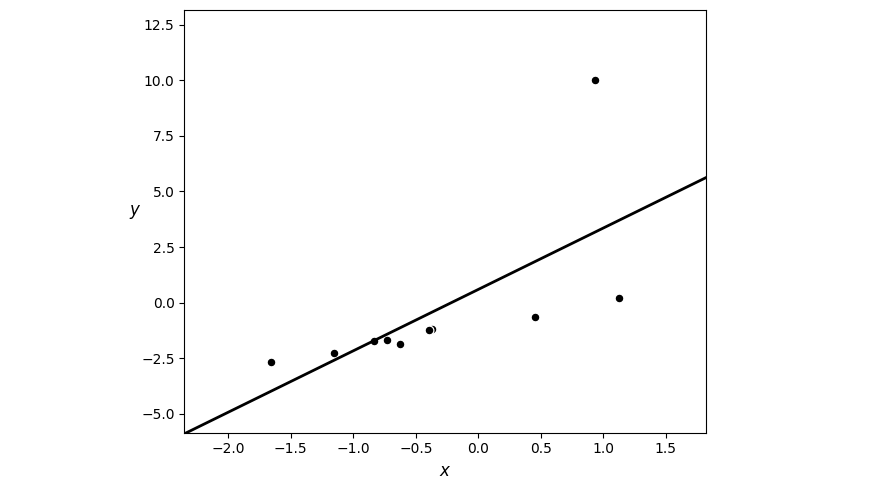

In [4]:
# grab best weights from minimization of Least Squares cost
ind = np.argmin(cost_history_1)
least_weights = weight_history_1[ind]
demo.plot_fit(plotting_weights = [least_weights])

---

##  Replacing squared error with absolute error

How can we make our linear regression framework more robust to outliers?  If we return the original derivation of the Least Squares cost function in the previous Section, our aim in learning a linear regressor is to learn a set of ideal weights so that 

\begin{equation}
\mathring{\mathbf{x}}_{p}^T\mathbf{w}^{\,} \approx \overset{\,}{y}_{p}^{\,}  \,\,\,\,\,\,\,\, p=1,...,P
\end{equation}

for a dataset of $P$ points $\left \{ \mathbf{x}_p,\,y_p \right \}_{p=1}^P$.  To learn these ideal weights the first step we took there was to square the difference between both sides of each desired approximation  - i.e., each error - above as 

\begin{equation}
g_p\left(\mathbf{w}\right) = \left(\mathring{\mathbf{x}}_{p}^{T}\mathbf{w} - \overset{\,}{y}_p^{\,}\right)^2
  \,\,\,\,\,\,\,\, p=1,...,P.
\end{equation}

Each of these measures the *squared error* between model $\mathring{\mathbf{x}}_{p}^{T}\mathbf{w}$ and $\overset{\,}{y}_p^{\,}$.  Taking the average of these $P$ squared error terms gave us the Least Squares cost function.  

 As an alternative to using a *squared* error for our point-wise cost we can instead measure the *absolute error* for each desired approximation
 
 \begin{equation}
g_p\left(\mathbf{w}\right) =  \left \vert \mathring{\mathbf{x}}_{p}^{T}\mathbf{w} - \overset{\,}{y}_p^{\,}
\right \vert  \,\,\,\,\,\,\,\, p=1,...,P.
\end{equation}

By using absolute error instead of the squared variety we still treat negative and positive errors equally, but we do not exaggerate the importance of large errors greater than $1$ (since, of course, we do not square them).  If we form the average of these absolute error point-wise costs we have the cousin of Least Squares, the so-called *Least Absolute Deviations* cost function 

\begin{equation}
\,g\left(\mathbf{w}\right)=\frac{1}{P}\sum_{p=1}^{P} g_p\left(\mathbf{w}\right) = \frac{1}{P}\sum_{p=1}^{P}\left \vert \mathring{\mathbf{x}}_{p}^{T}\mathbf{w} - \overset{\,}{y}_p^{\,}
\right \vert.
\end{equation}

The only price we pay in employing the absolute error instead of the squared error is a technical one: we are more limited in which optimization schemes we can apply to minimize the Least Absolute Deviations cost.  While this cost function is also always convex regardless of the input dataset, can only use zero / first order methods  to properly minimize it no second order methods (because the second derivative of this cost function is zero almost everywhere, as can easily be shown). 

Nonetheless, being limited to using local optimization methods like gradient descent is no severe condemnation - gradient descent is the most widely used optimization algorithm in machine learning / deep learning!

#### <span style="color:#a50e3e;">Example 2: </span>  Least absolute deviations versus Least Squares

With the sort of implementation philosophy described in the previous Section - where we break down a cost function into its basic components for modular implementation - we can think equivalently about the cost in equation (4) as

\begin{equation}
\,g\left(\mathbf{w}\right)=\frac{1}{P}\sum_{p=1}^{P}\left\vert\text{model}\left( \mathbf{x}_p,\mathbf{w}\right) -y_{p}^{\,}\right\vert.
\end{equation}

where we have denoted our linear `model` of the input and weights as

\begin{equation}
\text{model}\left(\mathbf{x}_p,\mathbf{w}\right) = \mathring{\mathbf{x}}_{p}^{T}\mathbf{w}.
\end{equation}

In implementing the cost in `Python` we can employ the ``model`` function we used with our Least Squares implementation shown in e.g., Example 1, since this is how we implement the linear combination of our input and weights.  All we then need to do is slightly alter the cost function itself to get our desired implementation, as shown below.

In [5]:
# a compact least absolute deviations cost function
def least_absolute_deviations(w):
    cost = np.sum(np.abs(model(x,w) - y))
    return cost/float(np.size(y))

Below we plot the surface / contour plot of this cost function using the previously shown dataset - indeed it is convex.

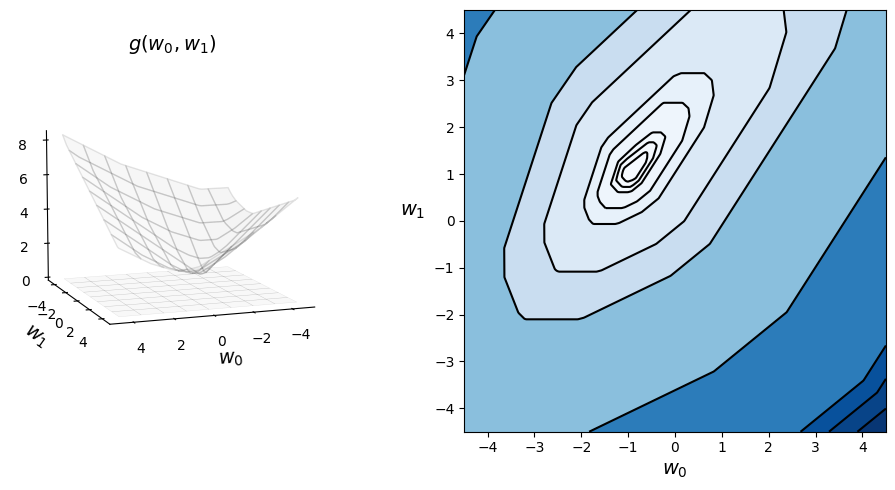

In [6]:
# show run in both three-dimensions and just the input space via the contour plot
section_5_3_helpers.static_visualizer().two_input_surface_contour_plot(least_absolute_deviations,[],view = [10,70],xmin = -4.5, xmax = 4.5, ymin = -4.5, ymax = 4.5,num_contours = 20)

Below we run gradient descent for $100$ iterations, using the same choice of steplength parameter as used in the previous example.

In [7]:
# run gradient descent to minimize the Least Squares cost for linear regression
g = least_absolute_deviations; w = np.array([1.0,1.0])[:,np.newaxis]; max_its = 100; alpha_choice = 10**(-1);
weight_history_2,cost_history_2 = section_5_3_helpers.gradient_descent(g,alpha_choice,max_its,w)

Now we plot and compare the best fit found via gradient descent for both cost functions on the dataset.  The Least Squares fit is shown in black, while the Least Absolute Deviation fit is shown in magenta.  The latter fits considerably better, since it does not exaggerate the large error produced by the single outlier.

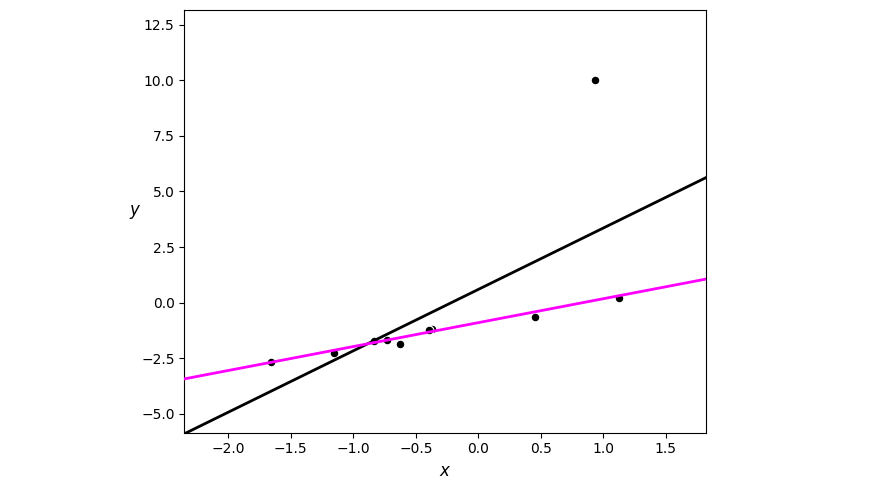

In [8]:
# find best set of weights from gradient descent run on Least Absolute Deviations cost 
ind = np.argmin(cost_history_2)
absolute_weights = weight_history_2[ind]
demo.plot_fit(plotting_weights = [least_weights,absolute_weights])